In [17]:
#importeer de nodige paketten en functies
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import plotnine
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt
!pip install jellyfish
import jellyfish
from sklearn.manifold import MDS


#functies

def scree_plot(pca_model):
    PC_values = np.arange(pca_model.n_components_) + 1
    plt.plot(PC_values, pca_model.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    return()

def biplot_func(score, pca_model, labels=None, y=None, show_index=False):
    coeff=np.transpose(pca_model.components_[0:2, :]).copy()
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    coeff[:, 0] = coeff[:,0]*xs.std()*np.sqrt(len(xs))
    coeff[:, 1] = coeff[:,1]*ys.std()*np.sqrt(len(ys))
    fig, ax = plt.subplots()
    im = ax.scatter(xs, ys, c = y) #use y as color
    if show_index:
        for i in range(len(xs)):
            ax.text(xs[i], ys[i], i+1)
    if not y is None:
        fig.colorbar(im, ax=ax)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center')           
    ax.set_xlim(1.2*min(np.min(coeff[:, 0]), np.min(xs)), 1.2*max(np.max(coeff[:, 0]), np.max(xs)))
    ax.set_ylim(1.2*min(np.min(coeff[:, 1]), np.min(ys)), 1.2*max(np.max(coeff[:, 1]), np.max(ys)))
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    ax.grid()
    return(fig, ax)

**1. Zware metalen in de Schelde**

Aan het departement omgeving onderzochten enkele onderzoekers de vervuiling van grasland
in de nabijheid van de rivier de Schelde. De concentratie van acht zware metalen (cadmium,
chroom, koper, ijzer, mangaan, nikkel, lood, zink) werd gemeten op 19 verschillende locaties
elke keer op een diepte van 5 en 20 cm. De nabijheid van de locatie tot de rivier werd genoteerd
als ver(0) of dicht(1). Je vindt de data terug in **heavymetals.csv**.

**1.1. Lees de data in en bestudeer ze zodat je er voeling mee krijgt.**

In [2]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/heavymetals.csv'

df=pd.read_csv(url)
df.head()

,location,Cd5,Cd20,Cr5,Cr20,Cu5,Cu20,Fe5,Fe20,Mn5,Mn20,Ni5,Ni20,Pb5,Pb20,Zn5,Zn20,river
0,1,11.985549,10.248267,222.626423,201.704108,53.073686,47.127967,21082.422949,21115.642286,560.694658,539.509975,26.564668,28.185780,125.561693,110.016628,669.780898,566.873880,1
1,2,18.879780,21.305590,380.835214,472.996839,87.105354,98.220062,26086.565207,27674.416450,585.173876,439.722016,30.230354,31.932810,228.326793,249.615777,1308.674304,1500.207461,1
2,3,18.596573,25.293862,367.931598,471.080071,85.195973,99.346959,26505.513017,28401.947875,496.138010,492.556233,29.315192,32.593912,242.454283,271.708647,1338.875830,1579.756162,1
3,4,29.266197,28.375580,509.721009,536.508923,81.332707,107.378701,26227.868930,31017.349203,507.927708,445.994337,29.815369,35.302712,220.862755,283.042973,1311.174316,1696.887110,1
4,5,27.338299,16.642950,459.452164,374.883073,80.171948,89.435765,26673.331334,25223.073606,492.952114,375.191561,30.209437,30.453776,240.267920,256.055329,1356.359759,1399.907122,1


**1.2. Voer een PCA-analyse uit. Schaal je de data of niet? Hoeveel componenten zou je behouden?**

Data schalen kan je doen via:

- scaler = StandardScaler()

- scaler.fit(X)

- X=scaler.transform(X)


()

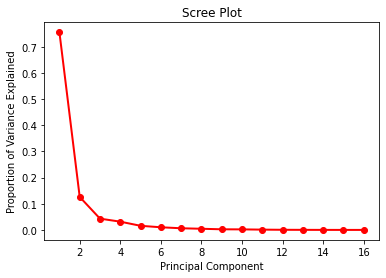

In [3]:
X=df.loc[:, ***]
y=df.loc[:, ***]

#schalen?
***

#PCA fitten
pca_model = PCA()
x_new = pca_model.fit_transform(X)

#hoeveel componenten heb je nodig?
***

**1.3. Maak een biplot en interpreteer deze. Kleur de locaties in de biplot volgens de nabijheid bij de rivier.**

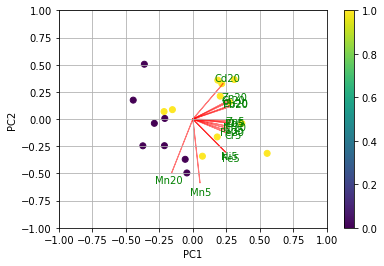

In [4]:
# 1.3. biplot
[fig, ax] = biplot_func(***, ***, 
                        labels=df.loc[:, 'Cd5':'Zn20'].columns,  y=y)

**2. Gestrande dolfijnen**

Van een aantal gestrande dolfijnen aan de Schotse kusten, heeft men de vetzurensamenstelling
van hun vetlaag bestudeerd. De samenstelling - en dan vooral de hoeveelheid kortere versus
langere en onverzadigde versus verzadigde vetzuren - kan namelijk een indicatie zijn voor het
dieet van de dolfijnen. Voor meer dan 20 vetzuren werd de aanwezige concentratie bepaald. Je
kan de data terugvinden in **dolfijnen.csv**.

Vetzuren zijn genoteerd als FAxx.yy. De xx staat voor het aantal koolstofatomen in de vetzuurketen. De yy geeft het aantal dubbele bindingen weer. Verzadigde vetzuren hebben er geen,
dus daar is yy gelijk aan nul. Onverzadigde vetzuren worden genoteerd als an.b, waarbij a
het aantal dubbele bindingen geeft, en b het eerste koolstofatoom waar een dubbele binding
voorkomt (telkens te tellen van het uiteinde, niet de -COOH kop).
Dus bvb FA20.4n.3 is een onverzadigd vetzuur met een koolstofketen van 20 koolstofatomen
en 4 dubbele bindingen (telkens gescheiden door een CH2) die beginnen op positie 3.

**2.1. Lees de data in en bestudeer ze zodat je er voeling mee krijgt.**

In [5]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/dolfijnen.csv'

df=pd.read_csv(url)
df.head()

,FA12.0,FA14.0,FA14.1.n.5,FA15.0,FA16.0,FA16.1n.7,FA16.2n.6,FA16.3n.6,FA16.4n.3,FA18.0,...,FA20.3,FA20.4n.3,FA20.5n.3,FA22.0,FA22.1n.11,FA22.1n.9,FA21.5n.3,FA22.5n.3,FA22.6n.3,FA24.1n.9
0,0.75,8.08,1.64,0.54,8.33,15.62,0.52,0.64,0.21,1.54,...,0.13,1.14,4.37,0.11,6.24,0.28,0.24,2.58,8.95,0.10
1,0.28,3.03,0.33,0.43,9.36,9.87,0.22,0.13,0.10,2.38,...,0.19,1.11,8.67,0.04,1.75,0.18,0.38,7.55,18.83,0.24
2,0.80,5.49,0.60,0.45,8.84,11.04,0.60,0.28,0.39,1.99,...,0.11,1.18,6.85,0.02,4.57,0.23,0.40,4.56,13.69,0.22
3,0.92,6.22,1.39,0.55,7.46,13.80,0.54,0.22,0.33,1.88,...,0.12,1.08,5.35,0.07,4.96,0.17,0.33,4.17,13.42,0.22
4,1.02,6.59,1.82,0.47,8.50,19.33,0.80,0.24,0.28,1.55,...,0.11,0.82,4.87,0.03,3.25,0.00,0.23,2.17,9.71,0.18


**2.2. Voer een PCA-analyse uit. Hoeveel dimensies zou je behouden om deze data voor te stellen?**

()

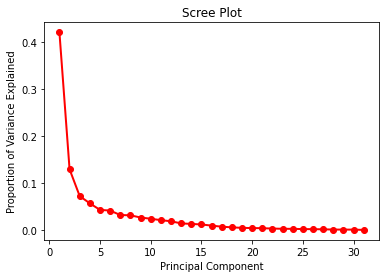

In [6]:
X=***

# scale data and fit pca
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#PCA model fitten
***

#hoeveel componenten heb je nodig?
***

**2.3. Interpreteer de eerste component. Bekijk hiervoor de nodige diagnostische grafieken voor de eerste twee dimensies. Kijk ook eens naar de loadings voor de verschillende vetzuren.**

In [7]:
df_pc=pd.DataFrame()
df_pc['PC1']=pca_model.components_[***] #eerste component
df_pc['PC2']=pca_model.components_[***] #tweede component
df_pc['FA']=*** #naam van de vetzuren
df_pc #toon de dataframe

,PC1,PC2,FA
0,-0.228194,-0.134454,FA12.0
1,-0.241140,-0.131242,FA14.0
2,-0.232184,0.165669,FA14.1.n.5
3,-0.160834,-0.267374,FA15.0
4,-0.046661,0.080202,FA16.0
5,-0.235143,0.214908,FA16.1n.7
6,-0.080997,-0.279933,FA16.2n.6
7,-0.005940,-0.046879,FA16.3n.6
8,0.157522,-0.125422,FA16.4n.3
9,0.240463,-0.020633,FA18.0


In [1]:
#plot
p=ggplot(aes(x=***, y=***), data=***)
p + geom_text(aes(label=***)) #plot de index

NameError: name 'ggplot' is not defined

**2.4. Er bevinden zich 4 dolfijnen in de dataset die doodgeboren zijn, kan je hen identificeren?**

De matplotlib oplossing wordt gegeven. Probeer een analoge figuur te maken met ggplot.

In [2]:
#matplotlib oplossing
plt.scatter(x_new[:, 0], x_new[:, 1], marker=' ')
for i in range(len(x_new)):
    plt.text(x_new[i, 0], x_new[i, 1], i+1)

NameError: name 'plt' is not defined

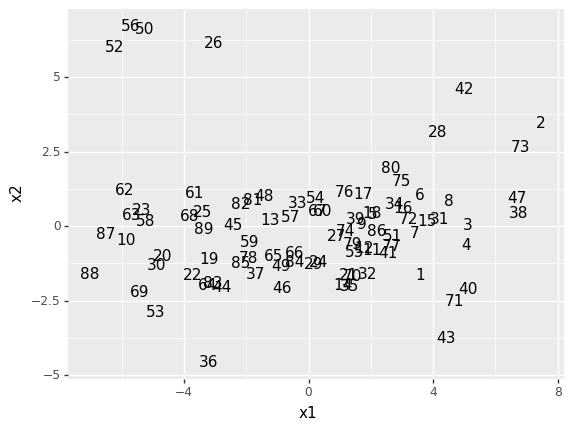

<ggplot: (-9223371902767749365)>

In [15]:
#plotnine
df_score=pd.DataFrame()
df_score['x1']=*** #eerste component
df_score['x2']=*** #tweede component
df_score['index']=***

p=ggplot(aes(x=***, y=***), data=***)
p + geom_text(aes(label=***)) #plot de index

**3. Vergelijking van IGHV eiwitten**

Immunoglobulin Heavy Chain Variable Region eiwitten (IGHV), maken deel uit van de zware
keten in immunoglobulines, ook wel antilichamen genoemd. Samen met de lichte ketens herkennen deze lichaamsvreemde stoffen (antigenen) en helpen zo het immuunsysteem lichaamsvreemde stoffen uit het lichaam te verwijderen. Zowel de zware keten, als de lichte keten zijn telkens opgebouwd uit een onveranderlijk deel (constant region) en een variabel deel (variable
region). De variabele regio heeft enkele hypervariabele delen die zorgen voor de specifieke herkenning van een bepaald antigen, en minder variabele delen die voor de secundaire structuur van het eiwit zorgen.

We hebben enkele eiwitsequenties van de variabele regio’s voor menselijke IGHV’s (Homo
sapiens, n = 15), IGHV’s in muis (Mus musculus, n = 3) en IGHV’s in orang-oetang (Pongo
albelii, n = 3). We zijn ge¨ınteresseerd of deze eiwitten tussen de verschillende species veel
verschillen vertonen. Je vindt de eiwitsequenties terug in **eiwitseq.fa**.

**3.1 Lees de data in**

In [16]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/eiwitseq.fa'
df=pd.read_csv(url)
df.head()

,Soort,DNA
0,PONAB,MDTLCYTLLLLTTPSWVLSQVTLKESGPALVKPTETLTLTCTVSGF...
1,PONAB,MDWTWMILFLVAAATGAHSQVQLVQSGAEVKKPGASVKFSCKASGY...
2,PONAB,EVQLVESGGGLVQPGGSLRLSCAASGFTFSDHYMDWVRQAPGKGLE...
3,MOUSE,MGWSCIMLFLAATATGVHFQVQLQQPGAELVKPGASVKLSSKASGY...
4,MOUSE,MGWSCIMLFLAATATGVHSQVQLQQPGAELVKPGASVKLSCKASGY...


**3.2. Bepaal via een paarsgewijze vergelijking de Levenshtein afstand tussen de sequenties doormiddel van het jellyfish package.**

In [19]:
n=df.shape[0] #aantal datapunten

lev_matrix=np.zeros((***, ***), dtype='int') #alloceer resultaat

for i in range(***):
    for j in range(***):
        lev_matrix[***, ***]=jellyfish.levenshtein_distance(df[***][***], df[***][***])

**3.3. Voer een MDS analyse uit op de Levenshtein afstandsmatrix.**

In [20]:
model_mds=MDS(dissimilarity=***)
pos=model_mds.fit_transform(lev_matrix)

**3.4. Maak een grafiek waarbij je de eiwit labels meegeeft en de punten kleurt per soort. Wat kan je hier uit besluiten?**

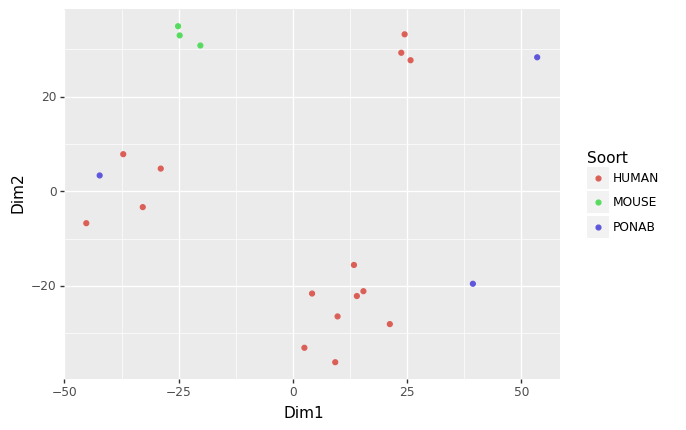

<ggplot: (-9223371902767510973)>

In [25]:
#plotnine
df_mds=pd.DataFrame()
df_mds['Dim1']=pos[***]
df_mds['Dim2']=pos[***]
df_mds['Soort']=*** #soort


p=ggplot(aes(x=***, y=***), data=***)
p + geom_point(aes(color=***))